# Hypothesis testing (continued)

Let's calculate the probabilities of the example

In [18]:
from scipy import stats

# Different values of p
p = [0.5, 0.6, 0.7]

# A priori probabilities for each p
probabilities_a_priori = [0.5, 0.3, 0.2]

# Calculate the likelihoods
binom_distribution = stats.binom(n=10, p=p)
likelihoods = binom_distribution.pmf(7)

# Calculate the probability of the intersections
probability_intersection = probabilities_a_priori*likelihoods

# Total probability of the data
total_probability_of_data = sum(probability_intersection)

# Calculate the posterior probabilities of each hypothesis
posterior_probabilities = probability_intersection/total_probability_of_data

print(posterior_probabilities)
print(likelihoods)

[0.33205759 0.36551343 0.30242898]
[0.1171875  0.21499085 0.26682793]


In [15]:
posterior_probability_H_0=posterior_probabilities[0]
posterior_probability_H_1=posterior_probabilities[1]+posterior_probabilities[2]
print('The posterior probability of H0 is {:.2f}'.format(posterior_probability_H_0))
print('The posterior probability of H1 is {:.2f}'.format(posterior_probability_H_1))

The posterior probability of H0 is 0.33
The posterior probability of H1 is 0.67


This means that, 

$$P\left( {{H_0}\left| y \right.} \right) = 0.33$$
$$P\left( {{H_1}\left| y \right.} \right) = 0.37 + 0.30 = 0.67.$$

This shows that, given the data, $H_1$ is twice more likelly than $H_0$.

In general, calculating the posterior probabilities of each hypothesis is not easy, that's why is easier to analyze the Bayes factor (although in this problem is not necessary because we already have the posterior probability for each hypothesis).

As an example, let's calculate the Bayes factor for this problem.

$$BF = \frac{{P\left( {y\left| {{H_0}} \right.} \right)}}{{P\left( {y\left| {{H_1}} \right.} \right)}}.$$

The value of ${P\left( {y\left| {{H_0}} \right.} \right)}$ we already have it, is just the probability of getting 7 heads in 10 tossings with a fair coin, 

$$P\left( {y\left| {{H_0}} \right.} \right) = \left( \begin{gathered}
  10 \hfill \\
  7 \hfill \\ 
\end{gathered}  \right){0.5^7}{0.5^3} = 0.1172.$$

To calculate $P\left( {y\left| {{H_1}} \right.} \right)$ we need to be more careful. Under $H_1$, $p$ can take two values: $0.6$ and $0.7$, therefore 

$$\begin{align*}P\left( {y\left| {{H_1}} \right.} \right) &= P\left( {y\left| {\left\{ {p = 0.6} \right\} \cap {H_1}} \right.} \right)P\left( {p = 0.6\left| {{H_1}} \right.} \right) + P\left( {y\left| {\left\{ {p = 0.7} \right\} \cap {H_1}} \right.} \right)P\left( {p = 0.7\left| {{H_1}} \right.} \right)\\
&= P\left( {y\left| {p = 0.6} \right.} \right)P\left( {p = 0.6\left| {{H_1}} \right.} \right) + P\left( {y\left| {p = 0.7} \right.} \right)P\left( {p = 0.7\left| {{H_1}} \right.} \right)\end{align*}.$$

Let's calculate $P\left( {p = 0.6\left| {{H_1}} \right.} \right)$:

$$\begin{align*}
  P\left( {p = 0.6|{H_1}} \right) &= P\left( {p = 0.6|\left\{ {p = 0.6} \right\} \cup \left\{ {p = 0.7} \right\}} \right) = \frac{{P\left( {\left\{ {p = 0.6} \right\} \cap \left( {\left\{ {p = 0.6} \right\} \cup \left\{ {p = 0.7} \right\}} \right)} \right)}}{{P\left( {\left\{ {p = 0.6} \right\} \cup \left\{ {p = 0.7} \right\}} \right)}} \\ 
   &= \frac{{P\left( {p = 0.6} \right)}}{{P\left( {p = 0.6} \right) + P\left( {p = 0.7} \right)}} = \frac{{0.3}}{{0.5}} \\
   &= 0.6,
\end{align*}$$

which this implies that $P\left( {p = 0.7|{H_1}} \right)=0.4.$

Then, 

$$P\left( {y\left| {{H_1}} \right.} \right) = 0.215\times 0.6 + 0.27\times 0.4 = 0.237.$$

Now, we can plug this on the expression for the Bayes factor to obtain that

$$BF = \frac{{0.1172}}{{0.234}} = 0.49.$$

Because is smaller than 1, is better to analyze the inverse $\frac{1}{{BF}} = 2.04$, which shows that there is some evidence in favor of $H_1$.

**NOTE:** When you have the posterior probabilities, the bayes factor can be calculated as 

$$BF = \left( {\frac{{P\left( {{H_0}\left| y \right.} \right)}}{{P\left( {{H_1}\left| y \right.} \right)}}} \right)\underbrace {\left( {\frac{{P\left( {{H_1}} \right)}}{{P\left( {{H_0}} \right)}}} \right)}_1 = \frac{{P\left( {{H_0}\left| y \right.} \right)}}{{P\left( {{H_1}\left| y \right.} \right)}} = \frac{{0.33}}{{0.67}} = 0.49.$$

Here we have used that the prior probability for both hypothesis is 0.5 (this is case in most of the problems).

$$P\left( {{H_1}} \right) = P\left( {\left\{ {p = 0.6} \right\} \cup \left\{ {p = 0.7} \right\}} \right) = \underbrace {P\left( {\left\{ {p = 0.6} \right\}} \right)}_{0.3} + \underbrace {P\left( {\left\{ {p = 0.7} \right\}} \right)}_{0.2} = 0.5.$$


## Case when $H_1$ is not discrete

Now, let's suppouse we want to compare $H_0: p=0.5$ against $H_1: p\neq 0.5$. Under $H_1$ we need to choose a prior distribution for $p$, let $f(p)$ be the density of that prior. In order to calculate the Bayes factor, we just need to calculate the likelihood under $H_1$, that is $P\left( {y\left| {{H_1}} \right.} \right)$ (remeber that the likelihood under $H_0$ we already have it).

The expression for $P\left( {y\left| {{H_1}} \right.} \right)$ becomes

$$P\left( {y\left| {{H_1}} \right.} \right) = \int\limits_{ - \infty }^{ + \infty } {\left( \begin{gathered}
  10 \hfill \\
  7 \hfill \\ 
\end{gathered}  \right){p^7}{{\left( {1 - p} \right)}^3}f\left( p \right)dp}.$$

These integrals are really complicated to calculate and most of the time we need to do numerical approximations. To calculate these integrals with PyMC3 we need to use the Sequential Monte Carlo sampler. This is a method that basically progresses by a series of successive annealed sequences from the prior to the posterior. A nice by-product of this process is that we get an estimation of the marginal likelihood. Actually for numerical reasons the returned value is the log marginal likelihood (this helps to avoid underflow).


In [51]:
import pymc3 as pm
import theano
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

with pm.Model() as model_under_h1:
    p = pm.Beta('p', 10, 10)
    y = pm.Binomial('y', n=10, p=p, observed=7)
    trace_BF_1 = pm.sample_smc(2500)

# Obtaining the marginal likelihood
likelihoods_under_h1  = np.exp(trace_BF_1.report.log_marginal_likelihood)
# We need to take the average because the Monte-Carlo sampler
# returns one marginal likelihood approxiamtion for each chain
print(np.average(likelihoods_under_h1))

# Storing the estimation of the likelihood under H1
likelihood_under_h1=np.average(likelihoods_under_h1)

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000


0.12583230984528582


In [52]:
# Under H0, the likelihood is just the probability of 
# getting 7 heads if the coin is fair
likelihood_under_h0 = stats.binom(n=10, p=0.5).pmf(7)

# Now we can calculate the Bayes factor
bayes_factor = likelihood_under_h0/likelihood_under_h1
print("The Bayes factor for the model is {0}".format(bayes_factor))
bayes_factor/(bayes_factor+1)

The Bayes factor for the model is 0.9312989656161068


0.4822137753897733

## Obtaining posterior probabilities from Bayes factor

Let \(BF\) be the Bayes factor. Take ${\pi _0} = P\left( {{H_0}} \right)$, ${\pi _1} = P\left( {{H_1}} \right)$, ${p_0} = P\left( {{H_0}\left| y \right.} \right)$ and ${p_1} = P\left( {{H_1}\left| y \right.} \right)$, then

$${p_0} = \frac{{{\pi _0}BF}}{{{\pi _0}BF + 1 - {\pi _0}}}.$$

This expression allows us to calculate posterior probabilities using the prior probabilities and the Bayes factor.

Using this expression on the previous example, we obtain that 

$$P\left( {{H_0}\left| y \right.} \right) = 0.48\quad ,\quad P\left( {{H_1}\left| y \right.} \right) = 0.52.$$

These posterior probabilities of $H_0$ are highly influenced by selection of the prior under $H_1$. The following code calculates the posterior probabilities of $H_0$ for priors of the form $Beta(\alpha,2\alpha)$ for different values of $\alpha$.

In [53]:
bayes_factors = list()
probabilities_of_h0 = list()
for a in range(1,11):
    with pm.Model():
        p = pm.Beta('p', a, 2*a)
        y = pm.Binomial('y', n=10, p=p, observed=7)
        trace_BF_H1 = pm.sample_smc(2500)
        # Obtaining the marginal likelihood
        likelihoods_under_h1  = np.exp(trace_BF_H1.report.log_marginal_likelihood)
        likelihood_under_h1 = np.average(likelihoods_under_h1)
        # Calculating the Bayes factor for the specific prior
        bayes_factor = likelihood_under_h0/likelihood_under_h1
        bayes_factors.append(bayes_factor)
        probabilities_of_h0.append(bayes_factor/(bayes_factor+1))

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.422
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.436
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.426
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.440
Stage:   1 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.544
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.508
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.550
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.522
Stage:   1 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.593
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.560
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.575
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.581
Stage:   1 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.610
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.613
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.613
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.612
Sta

In the following graph, we can see the results: if the prior contains a strong belief that the coin is biased toward tail (the bigger the alpha the more biased we think the coin is), then, because the data suggest otherwise, the probability that the coin is fair increases.

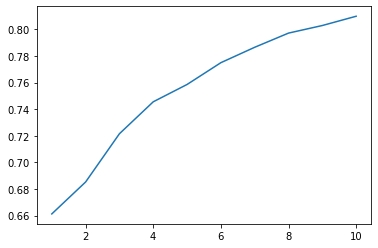

In [56]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(1,11)],probabilities_of_h0)
plt.show()

Now let's use priors that suggest the coin is biased towards heads.

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampl

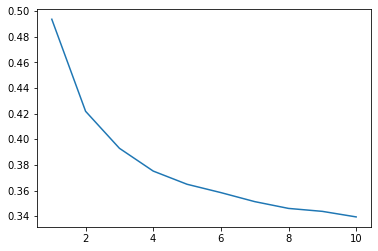

In [58]:
bayes_factors = list()
probabilities_of_h0 = list()
for a in range(1,11):
    with pm.Model():
        p = pm.Beta('p', 2*a, a)
        y = pm.Binomial('y', n=10, p=p, observed=7)
        trace_BF_H1 = pm.sample_smc(2500)
        # Obtaining the marginal likelihood
        likelihoods_under_h1  = np.exp(trace_BF_H1.report.log_marginal_likelihood)
        likelihood_under_h1 = np.average(likelihoods_under_h1)
        # Calculating the Bayes factor for the specific prior
        bayes_factor = likelihood_under_h0/likelihood_under_h1
        bayes_factors.append(bayes_factor)
        probabilities_of_h0.append(bayes_factor/(bayes_factor+1))
plt.plot([x for x in range(1,11)],probabilities_of_h0)
plt.show()

As we can see, in this scenario, the posterior probability of $H_0$ decreases when the prior is more informative.

Now let's suppouse we have more data, let's say we have $n=30$ and $21$ heads.

In [63]:
with pm.Model():
    p = pm.Beta('p', 10, 10)
    y = pm.Binomial('y', n=30, p=p, observed=21)
    trace_BF_1 = pm.sample_smc(2500)

    # Obtaining the marginal likelihood
    likelihoods_under_h1  = np.exp(trace_BF_1.report.log_marginal_likelihood)
    # We need to take the average because the Monte-Carlo sampler
    # returns one marginal likelihood approxiamtion for each chain
    # Storing the estimation of the likelihood under H1
    likelihood_under_h1=np.average(likelihoods_under_h1)
    
    # Under H0, the likelihood is just the probability of 
    # getting 7 heads if the coin is fair
    likelihood_under_h0 = stats.binom(n=30, p=0.5).pmf(21)

    # Now we can calculate the Bayes factor
    bayes_factor = likelihood_under_h0/likelihood_under_h1
    print("The Bayes factor for the model is {:.3f}, its inverse is {:.3f}".format(bayes_factor, 1/bayes_factor))
    print("The probability of H_0 given the data is {:.3f}".format(bayes_factor/(bayes_factor+1)))

Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.676
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.658
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.681
Stage:   1 Beta: 1.000
Stage:   0 Beta: 0.674
Stage:   1 Beta: 1.000


The Bayes factor for the model is 0.359, its inverse is 2.783
The probability of H_0 given the data is 0.264


As expected, when we have more data, the effect of the prior decreases.

## Body weight example

In an example from Chapter 14 of Berry (1996), the author was interested in
determining his true weight from a variable bathroom scale. We assume the
measurements are normally distributed with mean $\mu$ and standard deviation
$\sigma$. The author weighed himself ten times and obtained the measurements (in
pounds) 182, 172, 173, 176, 176, 180, 173, 174, 179, and 175. For simplicity,
assume that he knows the accuracy of the scale and $\sigma=3$ pounds.

If we let $\mu$ denote the author’s true weight, suppose he is interested in
assessing if his true weight is more than 175 pounds. He wishes to test the
hypotheses

$${H_0}:\mu  \leqslant 175,\quad {H_1}:\mu  > 175.$$

Suppose the author has little prior knowledge about his true weight and so he
assigns $\mu$ a normal prior with mean 170 and standard deviation 5.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 2_500 draw iterations (4_000 + 10_000 draws total) took 58 seconds.


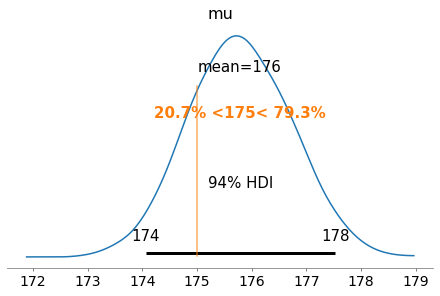

In [11]:
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az
data = [182, 172, 173, 176, 176, 180, 173, 174, 179, 175]

with pm.Model():
    # Normal prior for mu
    mu = pm.Normal('mu', mu=170, sd=5)
    # Likelihood
    y = pm.Normal('y',mu=mu, sigma=3, observed=data)
    # Obtaining the traces
    trace_weights = pm.sample(2500, progressbar=True)
    # Plot the sampled posterior using 175 as the reference value
    pp = az.plot_posterior(trace_weights, ref_val=175)
    plt.show()

The graph shows that, given the data, the probability of $H_0$, that is $P(\mu\leq 175|y)$, is just 19.2%, so we can conclude that it is unlikely that his weight is at most 175 pounds. 

If we were interested in calculating the Bayes factor, we could do it easily because we have the prior and posterior distributions for the parameter $\mu$:

$$BF = \frac{{P\left( {{H_0}\left| y \right.} \right)}}{{P\left( {{H_1}\left| y \right.} \right)}}\frac{{P\left( {{H_1}} \right)}}{{P\left( {{H_0}} \right)}} = \frac{{P\left( {\mu  \leqslant 175\left| y \right.} \right)}}{{P\left( {\mu  > 175\left| y \right.} \right)}}\frac{{P\left( {\mu  > 175} \right)}}{{P\left( {\mu  \leqslant 175} \right)}} = 0.045.$$

In [9]:
from scipy import stats
# P(mu<175) is calculated as stats.norm(loc=170,scale=5).cdf(175)
# P(mu>175)=1-P(mu<175)
bayes_factor = (0.192/0.808)*(1-stats.norm(loc=170,scale=5).cdf(175))/stats.norm(loc=170,scale=5).cdf(175)
print(bayes_factor)
1/bayes_factor

0.04480952491367768


22.316683828414337

Because the Bayes factor is very close to 0, we should analyze the inverse, obtaining 22.317, which indicates strong evidence against $H_0$.

**IMPORTANT NOTE:** It is very important to remember that these rules are just conventions, simple guides at best. Results should always be put into context of our problems and should be accompanied with enough details so others could evaluate by themselves if they agree with our conclusions. The evidence necessary to make a claim is not the same in particle physics, or a court, or to evacuate a town to prevent hundreds of deaths.

# Model comparison

Models should be designed as approximations to help us understand a particular problem,
or a class of related problems. Models are not designed to be verbatim copies of the real
world. Thus, all models are wrong in the same sense that maps are not the territory. Even
when a priori, we consider every model to be wrong, not every model is equally wrong;
some models will be better than others at describing a given problem. We'll study how to compare 
two or more models that are used to explain the same data. As we will learn, this is not a simple 
problem to solve and at the same time is a central problem in data analysis.

The Bayesian approach to comparing hypotheses can be generalized to compare two or more models. By
Bayes theorem

$$P\left( {\theta \left| y \right.} \right) = \frac{{P\left( {y\left| \theta  \right.} \right)P\left( \theta  \right)}}{{P\left( y \right)}},$$

We can make the dependency of the inference on a given model $M$ explicit and write:

$$P\left( {\theta \left| {y,{M_k}} \right.} \right) = \frac{{P\left( {y\left| {\theta ,{M_k}} \right.} \right)P\left( {\theta \left| {{M_k}} \right.} \right)}}{{P\left( {y\left| {{M_k}} \right.} \right)}}.$$


The term in the denominator is known as marginal likelihood. When doing inference, we do not need to compute this
normalizing constant, so in practice, we often compute the posterior up to a constant factor.
However, for model comparison and model averaging, the marginal likelihood is an
important quantity. If our main objective is to choose only one model, the best one, from a
set of models, we can just choose the one with the largest $P(y|M_k)$.

Suppose we wish to compare two Bayesian models, where it is possible that the definition of the parameter $\theta$ may differ between
models. Then the Bayes factor in support of model $M_0$ is the ratio of the
respective marginal likelihoods of the data for the two models.

$$BF = \frac{{P\left( {y\left| {{M_0}} \right.} \right)}}{{P\left( {y\left| {{M_1}} \right.} \right)}}.$$

When $BF>1$, model 0 explains data better than model 1.

If we let $y$ denote the vector of data and $\theta$ the parameter,
then a Bayesian model consists of a specification of the likelihood $f(y|\theta)$
and the prior density $g(\theta)$.

## Some ramarks about the likelihood

Now, we will briefly discuss some key facts about the marginal likelihood. By carefully
inspecting the definition of marginal likelihood, we can understand their properties and
consequences for their practical use:

$$p\left( {y\left| {{M_k}} \right.} \right) = \int\limits_{{\theta _k}} {p\left( {y\left| {{\theta _k},{M_k}} \right.} \right)p\left( {{\theta _k},{M_k}} \right)d{\theta _k}}.$$

* **The good:** Models with more parameters have a larger penalization than models
with fewer parameters. Bayes factor has a built-in Occam's Razor! The intuitive
reason for this is that the larger the number of parameters, the more spread the
prior with respect to the likelihood. Thus, when computing the integral in the
preceding formula, you will get a smaller value with a more concentrated prior.

* **The bad:** Computing the marginal likelihood is, generally, a hard task since the
preceding formula is an integral of a highly variable function over a high
dimensional parameter space. In general, this integral needs to be solved
numerically using more or less sophisticated methods.

* **The ugly:** The marginal likelihood depends sensitively on the values of the priors.


Using the marginal likelihood to compare models is a good idea because a penalization for
complex models is already included (thus preventing us from overfitting). At the same
time, a change in the prior will affect the computations of the marginal likelihood. At first,
this sounds a little bit silly—we already know that priors affect computations (otherwise,
we could simply avoid them), but the point here is the word sensitively. We are talking
about changes in the prior that will keep the inference of $\theta$ more or less the same, but could
have a big impact on the value of the marginal likelihood. 

## An example

Let's Suppose we are analyzing a coin and we have could use two different priors, one is Beta(4,8)
and the other is Beta(8,4). We would like to know which model explains the data better. Let $M_1$ be
the mdoel with the prior Beta(8,4) and $M_2$ the other.

In [26]:
data = [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

with pm.Model() as model_1:
    theta = pm.Beta('theta', 4, 8)
    y = pm.Bernoulli('p',p=theta,observed=data)
    traces_model_1 = pm.sample_smc(2500)

with pm.Model() as model_2:
    theta = pm.Beta('theta', 8, 4)
    y = pm.Bernoulli('p',p=theta,observed=data)
    traces_model_2 = pm.sample_smc(2500)

# Obtaining the marginal likelihoods for both models
likelihoods_under_model_1  = np.average(np.exp(traces_model_1.report.log_marginal_likelihood))
likelihoods_under_model_2  = np.average(np.exp(traces_model_2.report.log_marginal_likelihood))

# Now we can calculate the Bayes factor
bayes_factor = likelihoods_under_model_1/likelihoods_under_model_2


Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Stage:   0 Beta: 1.000
Initializing SMC sampler...
Multiprocess sampling (4 chains in 4 jobs)
Stage:   0 Beta: 0.207
Stage:   1 Beta: 0.675
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.209
Stage:   1 Beta: 0.687
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.205
Stage:   1 Beta: 0.677
Stage:   2 Beta: 1.000
Stage:   0 Beta: 0.213
Stage:   1 Beta: 0.685
Stage:   2 Beta: 1.000
11.546139664149385


In [28]:
print('The Bayes factor is {:.2f}'.format(bayes_factor))

The Bayes factor is 11.55


This Bayes factor strongly indicates that the model with the prior Beta(4,8) explains better the data than the model with prior Beta(8,4).